# DSfIOT: `scikit-learn` Tutorial
* This notebook covers different code implements from the scikit learn library, including:
  * Recaling and Standardizing Data 
  * Model Evaluation and Metrics 
  * Classification and regression machine learning algorithms 
  * Regularization
  * Optimising parameters 
  * Ensemble models 
  * Building Pipelines
* We will use the same datasets as those in the classification and regression tutorials, and will take code from the *Python Machine Learning* coursebook, as well as [Hands-On Machine Learning with Scikit-Learn and TensorFlow](https://www.amazon.co.uk/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1491962291/ref=sr_1_1?ie=UTF8&qid=1541011829&sr=8-1&keywords=hands+on+machine+learning+with+scikit-learn+and+tensorflow) and [Machine Learning with Python Cookbook](https://www.amazon.co.uk/Machine-Learning-Python-Cookbook-Chris/dp/1491989386/ref=pd_sim_14_5?_encoding=UTF8&pd_rd_i=1491989386&pd_rd_r=e03d308c-dd3d-11e8-9244-bbcc5e42676d&pd_rd_w=lQiym&pd_rd_wg=lVZwd&pf_rd_i=desktop-dp-sims&pf_rd_m=A3P5ROKL5A1OLE&pf_rd_p=1e3b4162-429b-4ea8-80b8-75d978d3d89e&pf_rd_r=KBZG3157A75PS5MPGY8K&pf_rd_s=desktop-dp-sims&pf_rd_t=40701&psc=1&refRID=KBZG3157A75PS5MPGY8K) (both excellent books should you wish to continue your studies in this area).





### Approach and Exercises
* Note that this notebook is not focussed on how to structure an end to end machine learning problem, but is about extending the code implementation in the classification and regression tutorials to further your knowledge.
* This notebook is a progression from the previous notebooks, meaning that the exercises will generally be more involved. We will provide code implementations for one of the datasets and leave space for you to code implementations on a different dataset. Support is available via slack. 
* Each section will have an exercise to help reinforce your learning. We suggest you:
   * Write out each line of code by hand (rather than copy and paste it from the relevant example) - this will improve your understanding of code syntax
   * Write out, above each line of code, an explanation as to what the code, using a comment `#` - this will improve your understanding of how the code works


## 1. Tutorial set up 
* Import statements
* Loading the datasets
* Reviewing the ML problem

In [1]:
# Use this only if you are working on jupyter notebooks and have jupyter themes installed. Else comment out
from jupyterthemes import jtplot
jtplot.style()

In [2]:
# import statements 
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_boston

import pandas as pd
import numpy as np
# we will generally import scikit learn libraries when the are required, so you understand which specifc libraries are required 

In [3]:
#expanding the cell width

pd.options.display.max_columns = 100

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [4]:
# load the classification dataset
class_data = load_breast_cancer()
class_X = pd.DataFrame(class_data.data, columns = class_data.feature_names)
class_y = class_data.target

# check the data has loaded successfully 
print(class_X.shape)
print(class_y.shape)

(569, 30)
(569,)


In [5]:
# load the regression dataset
boston = load_boston()
boston_X = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_y = boston.target

# check the data has loaded successfully 
print(boston_X.shape)
print(boston_y.shape)

(506, 13)
(506,)


## 2. Rescaling and Standardizing Data 
* Machine Learning algorithms can receive perform benefits from data that has been rescaled and standardized, either in terms of speed or accuracy, or both.
* There are a number of different ways of doing this, and implementations may vary because of algorithm requirements or personal preference.
* We cover two common implementations below, and an additional one in the exercise. We'd encourage further research to understand the maths in more detail.

In [6]:
## rescaling using MinMaxScaler, which converts data to a specified range, usually (0,1) or (-1,1)
## many machine learning algorithms assume data is on the same scale  

# here we import the necessary library 
from sklearn.preprocessing import MinMaxScaler

# Create feature - we will use one feature but you may just pass all the features to rescaler 
feature = class_X['texture error']

# print feature prior to rescaling
print("Features prior to rescaling:\n")
print(feature[0:10])

# we will print the shape out as well 
print("\nFeature shape prior to reshaping:")
print(feature.shape)

Features prior to rescaling:

0    0.9053
1    0.7339
2    0.7869
3    1.1560
4    0.7813
5    0.8902
6    0.7732
7    1.3770
8    1.0020
9    1.5990
Name: texture error, dtype: float64

Feature shape prior to reshaping:
(569,)


In [7]:
## because we have used a pandas column, our data has the wrong shape for the function
## we need a 2D tuple

# this will reshape the data 
feature = feature.values.reshape(-1,1)

# notice we now have a (samples,feature) tuple not just a (samples,) tuple
print("\nFeature shape after reshaping:")
feature.shape


Feature shape after reshaping:


(569, 1)

In [8]:
# we need to instantiate the scaler and pass in the range we want our values to be scaled within 
minmax_scale = MinMaxScaler(feature_range=(0, 1))

# Scale the feature - note the fit_transform function, in the next example we will separate these steps
scaled_feature = minmax_scale.fit_transform(feature)

# lets look at the features now we have rescaled
print("Features after rescaling:\n")
scaled_feature[0:10]

Features after rescaling:



array([[0.12046941],
       [0.08258929],
       [0.09430251],
       [0.17587518],
       [0.09306489],
       [0.11713225],
       [0.09127475],
       [0.22471711],
       [0.14184052],
       [0.27378006]])

In [9]:
## standardizing rescales features so that they are normally distributed, with a mean of 0 and a std deviation of 1

# import the appropriate library
from sklearn.preprocessing import StandardScaler

# we will transform all the features in the dataset, so let's look at it  prior to transformation
mean_std = pd.DataFrame(data={'mean':class_X.mean(), 'std':class_X.std()})

# call the dataframe
mean_std[0:10]

,mean,std
mean radius,14.127292,3.524049
mean texture,19.289649,4.301036
mean perimeter,91.969033,24.298981
mean area,654.889104,351.914129
mean smoothness,0.096360,0.014064
mean compactness,0.104341,0.052813
mean concavity,0.088799,0.079720
mean concave points,0.048919,0.038803
mean symmetry,0.181162,0.027414
mean fractal dimension,0.062798,0.007060


In [10]:
# Create scaler
scaler = StandardScaler()

# fit the scaler - this calculates the minimum and maximum values of the data
scaler.fit(class_X)

# transform the data using the fitted scaler - this applies the transform using the fit
standardized = scaler.transform(class_X)

# this shows the features transformed - note that this returns an array not a dataframe
standardized[0:5]

array([[ 1.09706398e+00, -2.07333501e+00,  1.26993369e+00,
         9.84374905e-01,  1.56846633e+00,  3.28351467e+00,
         2.65287398e+00,  2.53247522e+00,  2.21751501e+00,
         2.25574689e+00,  2.48973393e+00, -5.65265059e-01,
         2.83303087e+00,  2.48757756e+00, -2.14001647e-01,
         1.31686157e+00,  7.24026158e-01,  6.60819941e-01,
         1.14875667e+00,  9.07083081e-01,  1.88668963e+00,
        -1.35929347e+00,  2.30360062e+00,  2.00123749e+00,
         1.30768627e+00,  2.61666502e+00,  2.10952635e+00,
         2.29607613e+00,  2.75062224e+00,  1.93701461e+00],
       [ 1.82982061e+00, -3.53632408e-01,  1.68595471e+00,
         1.90870825e+00, -8.26962447e-01, -4.87071673e-01,
        -2.38458552e-02,  5.48144156e-01,  1.39236330e-03,
        -8.68652457e-01,  4.99254601e-01, -8.76243603e-01,
         2.63326966e-01,  7.42401948e-01, -6.05350847e-01,
        -6.92926270e-01, -4.40780058e-01,  2.60162067e-01,
        -8.05450380e-01, -9.94437403e-02,  1.80592744e+

In [11]:
# lets have another look at our transformed data
mean_std_transformed = pd.DataFrame(data={'mean':standardized.mean(), 'std':standardized.std()}, index=class_X.columns)

# call the dataframe
mean_std_transformed[0:10]

,mean,std
mean radius,-6.118909e-16,1.0
mean texture,-6.118909e-16,1.0
mean perimeter,-6.118909e-16,1.0
mean area,-6.118909e-16,1.0
mean smoothness,-6.118909e-16,1.0
mean compactness,-6.118909e-16,1.0
mean concavity,-6.118909e-16,1.0
mean concave points,-6.118909e-16,1.0
mean symmetry,-6.118909e-16,1.0
mean fractal dimension,-6.118909e-16,1.0


### EXERCISE SECTION 2: 
* Apply the `Rescaling` and `Standardization` functions to one or more features of the `Boston` dataset
* Research and implement a `Normalizer` function
* Have a think about what circumstances each of these functions might be most appropriate to apply to different data and why 
* We can discuss the implementations and benefits of each approach on Slack 

In [12]:
## EXERCISE CODE GOES HERE 



In [13]:
# Boston data
boston_data = load_boston()

In [14]:
boston_df = pd.DataFrame(data = boston_data.data, columns=boston_data.feature_names)
boston_df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [15]:
# Checking for data types of features and labels
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [16]:
# Checking for null values. There seems to be no null values. So no need for Imputation
boston_df.isnull().sum() 

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [17]:
# Checking for sparsity. ZN and CHAS have high amount of sparsity
boston_df[boston_df == 0].count()

CRIM         0
ZN         372
INDUS        0
CHAS       471
NOX          0
RM           0
AGE          0
DIS          0
RAD          0
TAX          0
PTRATIO      0
B            0
LSTAT        0
dtype: int64

In [18]:
# Calculating sparsity of the data
sparsity = boston_df[boston_df == 0].count().sum()/np.prod(boston_df.shape)
sparsity

0.12815445424141075

#### Different types of Scalers such as MinMax, MaxAbs Scalers exist. One way to check is plotting histogram

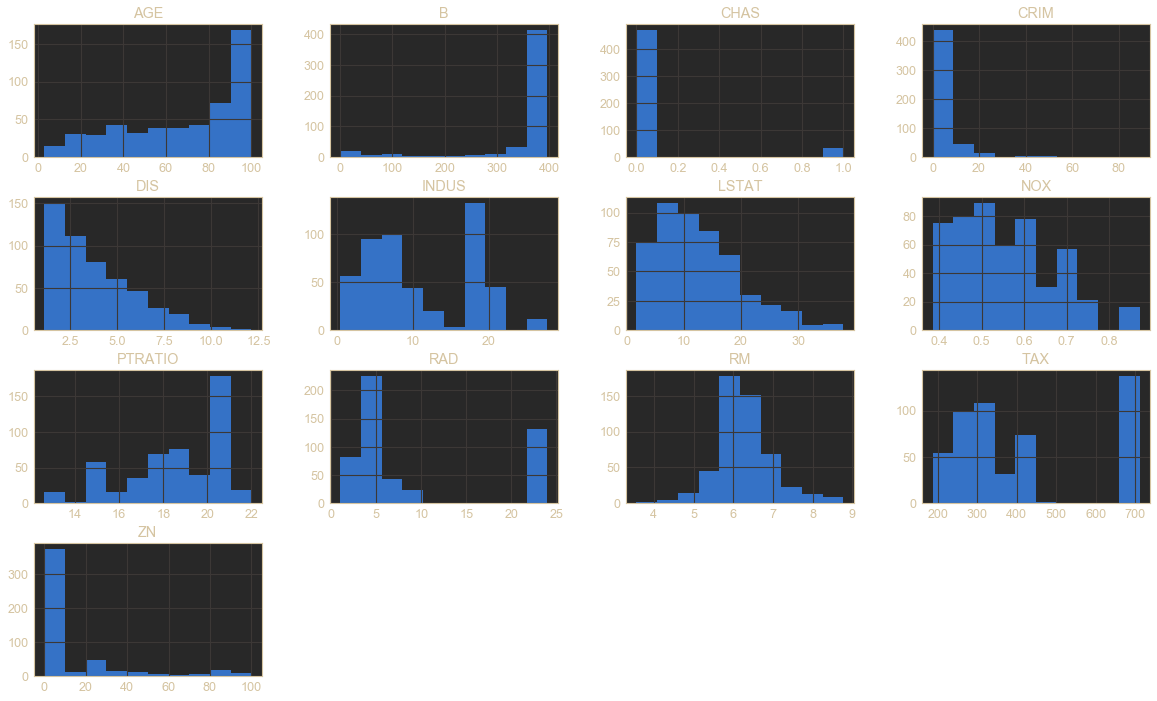

In [19]:
import matplotlib.pyplot as plt

%matplotlib inline

boston_df.hist(figsize = (20,12))
plt.show()

#### Clearly, from above we can infer that certain features will require normalization while others will require scaling

In [20]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [21]:
boston_stat_df = pd.DataFrame(data= np.array([boston_df.mean().values, boston_df.std().values, boston_df.median()]).T, 
                              index =  boston_df.columns, columns = ['mean', 'std', 'median'])
boston_stat_df

,mean,std,median
CRIM,3.613524,8.601545,0.25651
ZN,11.363636,23.322453,0.00000
INDUS,11.136779,6.860353,9.69000
CHAS,0.069170,0.253994,0.00000
NOX,0.554695,0.115878,0.53800
RM,6.284634,0.702617,6.20850
AGE,68.574901,28.148861,77.50000
DIS,3.795043,2.105710,3.20745
RAD,9.549407,8.707259,5.00000
TAX,408.237154,168.537116,330.00000


In [22]:
#estimating p-value using cumulative distribution function corresponding to t-statistic (assumption)

from scipy import stats

boston_stat_df['P-value'] = 2*(1 - stats.t.cdf( np.abs(boston_stat_df['mean']) / boston_stat_df['std'], len(boston_df)))
boston_stat_df

,mean,std,median,P-value
CRIM,3.613524,8.601545,0.25651,6.745895e-01
ZN,11.363636,23.322453,0.00000,6.262991e-01
INDUS,11.136779,6.860353,9.69000,1.051366e-01
CHAS,0.069170,0.253994,0.00000,7.854801e-01
NOX,0.554695,0.115878,0.53800,2.226823e-06
RM,6.284634,0.702617,6.20850,0.000000e+00
AGE,68.574901,28.148861,77.50000,1.518842e-02
DIS,3.795043,2.105710,3.20745,7.209907e-02
RAD,9.549407,8.707259,5.00000,2.732864e-01
TAX,408.237154,168.537116,330.00000,1.577547e-02


#### One could choose a combination of scalers depending on the p-value. Choosing a threshold p-value (0.1) above which the feature will be scaled and below which it will be standardized

In [23]:
# Choosing only MaxAbsScaler
from sklearn.preprocessing import MaxAbsScaler

boston_max_scaler = MaxAbsScaler()

In [24]:
max_fit = boston_max_scaler.fit(boston_df)

In [25]:
boston_max_transformed = max_fit.transform(boston_df)

In [26]:
type(boston_max_transformed)

numpy.ndarray

In [27]:
boston_df_max_transformed =  pd.DataFrame(data = boston_max_transformed, columns=boston_df.columns)
boston_df_max_transformed.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.000071,0.18,0.083273,0.0,0.617681,0.748861,0.652,0.337278,0.041667,0.416315,0.695455,1.000000,0.131156
1,0.000307,0.00,0.254867,0.0,0.538462,0.731321,0.789,0.409607,0.083333,0.340366,0.809091,1.000000,0.240716
2,0.000307,0.00,0.254867,0.0,0.538462,0.818337,0.611,0.409607,0.083333,0.340366,0.809091,0.989746,0.106136
3,0.000364,0.00,0.078587,0.0,0.525832,0.797039,0.458,0.499913,0.125000,0.312236,0.850000,0.994281,0.077430
4,0.000776,0.00,0.078587,0.0,0.525832,0.814009,0.542,0.499913,0.125000,0.312236,0.850000,1.000000,0.140374


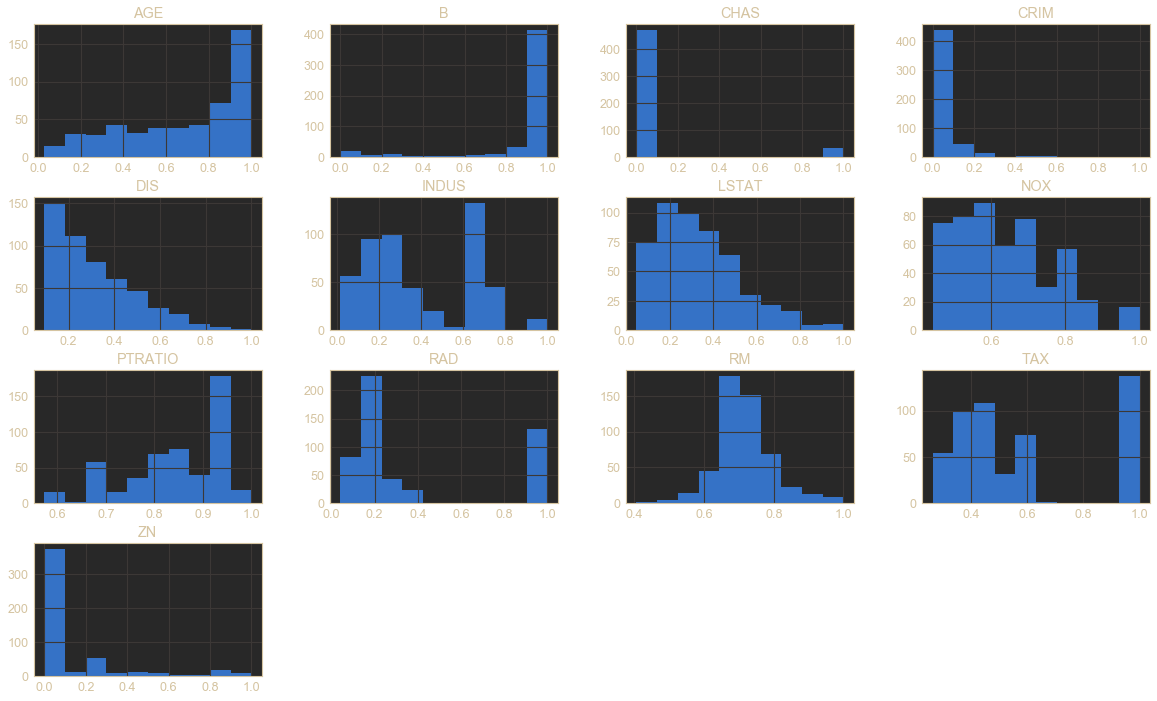

In [28]:
boston_df_max_transformed.hist(figsize = (20,12))
plt.show()

In [29]:
# Using Robust Scaler, which however does not work with sparse matrices

from sklearn.preprocessing import RobustScaler

In [30]:
robust_scaler = RobustScaler()

In [31]:
boston_r_scaled = robust_scaler.fit(boston_df)

In [32]:
boston_r_transformed = boston_r_scaled.transform(boston_df)

In [33]:
boston_df_r_transformed = pd.DataFrame(boston_r_transformed, columns = boston_df.columns)
boston_df_r_transformed.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.069593,1.44,-0.571650,0.0,0.000000,0.496612,-0.250765,0.285777,-0.20,-0.087855,-1.339286,0.261902,-0.637681
1,-0.063755,0.00,-0.202943,0.0,-0.394286,0.287940,0.028542,0.569789,-0.15,-0.227390,-0.446429,0.261902,-0.221889
2,-0.063760,0.00,-0.202943,0.0,-0.394286,1.323171,-0.334353,0.569789,-0.15,-0.227390,-0.446429,0.066675,-0.732634
3,-0.062347,0.00,-0.581720,0.0,-0.457143,1.069783,-0.646279,0.924391,-0.10,-0.279070,-0.125000,0.153016,-0.841579
4,-0.052144,0.00,-0.581720,0.0,-0.457143,1.271680,-0.475025,0.924391,-0.10,-0.279070,-0.125000,0.261902,-0.602699


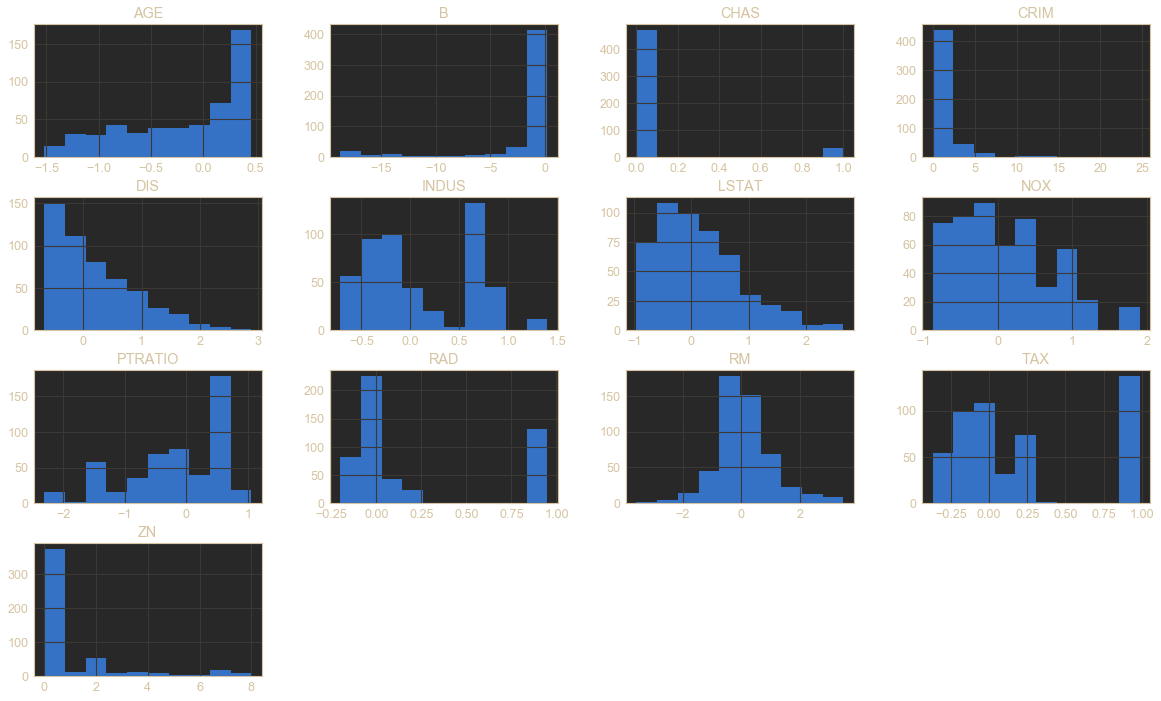

In [34]:
boston_df_r_transformed.hist(figsize=(20,12))
plt.show()

In [35]:
from sklearn.preprocessing import Normalizer

In [36]:
norm_scaler =  Normalizer(norm = 'l2')

In [37]:
boston_norm_scaled =  norm_scaler.fit(boston_df)

In [38]:
boston_norm_transformed = boston_norm_scaled.transform(boston_df)

In [39]:
boston_df_norm = pd.DataFrame(boston_norm_transformed, columns = boston_df.columns)
boston_df_norm.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.000013,0.035997,0.004620,0.0,0.001076,0.013149,0.130388,0.008179,0.002000,0.591945,0.030597,0.793727,0.009959
1,0.000058,0.000000,0.014977,0.0,0.000994,0.013602,0.167140,0.010522,0.004237,0.512648,0.037707,0.840785,0.019362
2,0.000059,0.000000,0.015174,0.0,0.001007,0.015421,0.131140,0.010661,0.004293,0.519409,0.038204,0.843138,0.008650
3,0.000071,0.000000,0.004785,0.0,0.001005,0.015360,0.100527,0.013306,0.006585,0.487268,0.041045,0.866174,0.006453
4,0.000151,0.000000,0.004755,0.0,0.000999,0.015587,0.118209,0.013222,0.006543,0.484177,0.040784,0.865631,0.011625


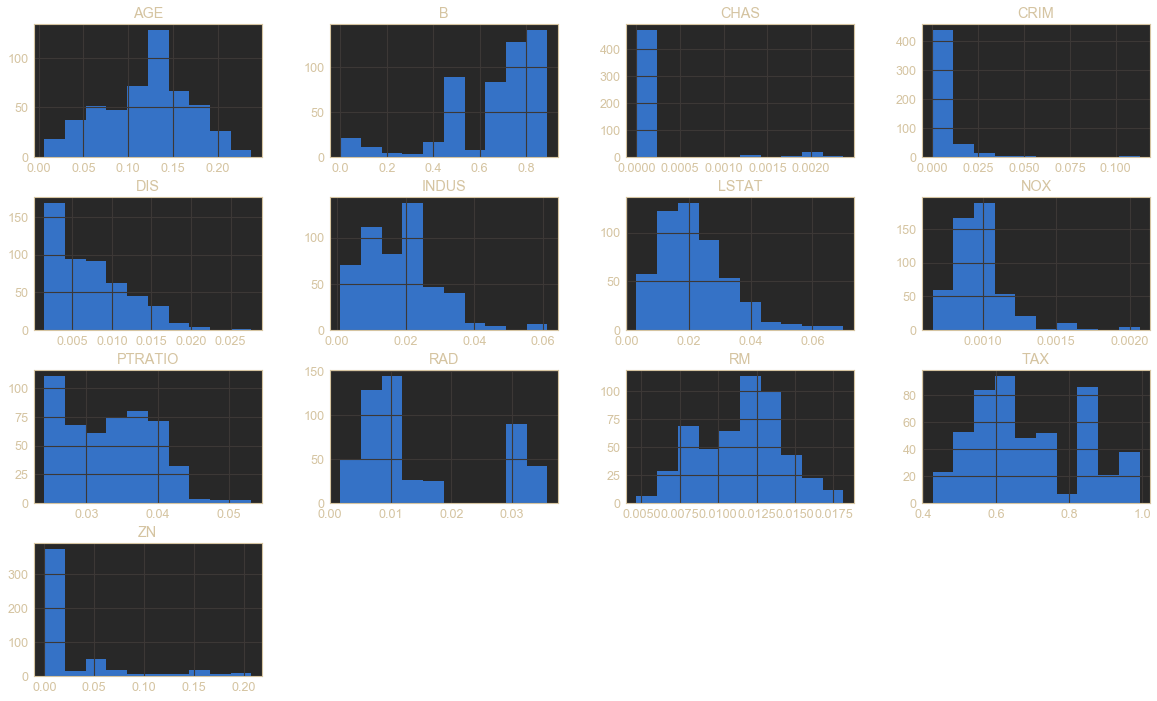

In [40]:
boston_df_norm.hist(figsize=(20,12))
plt.show()

In [41]:
standard_scale = StandardScaler()
boston_stnd_scled = standard_scale.fit(boston_df)
boston_stnd_transf = boston_stnd_scled.transform(boston_df)
boston_df_stnd_transf = pd.DataFrame(boston_stnd_transf, columns = boston_df.columns)
boston_df_stnd_transf.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


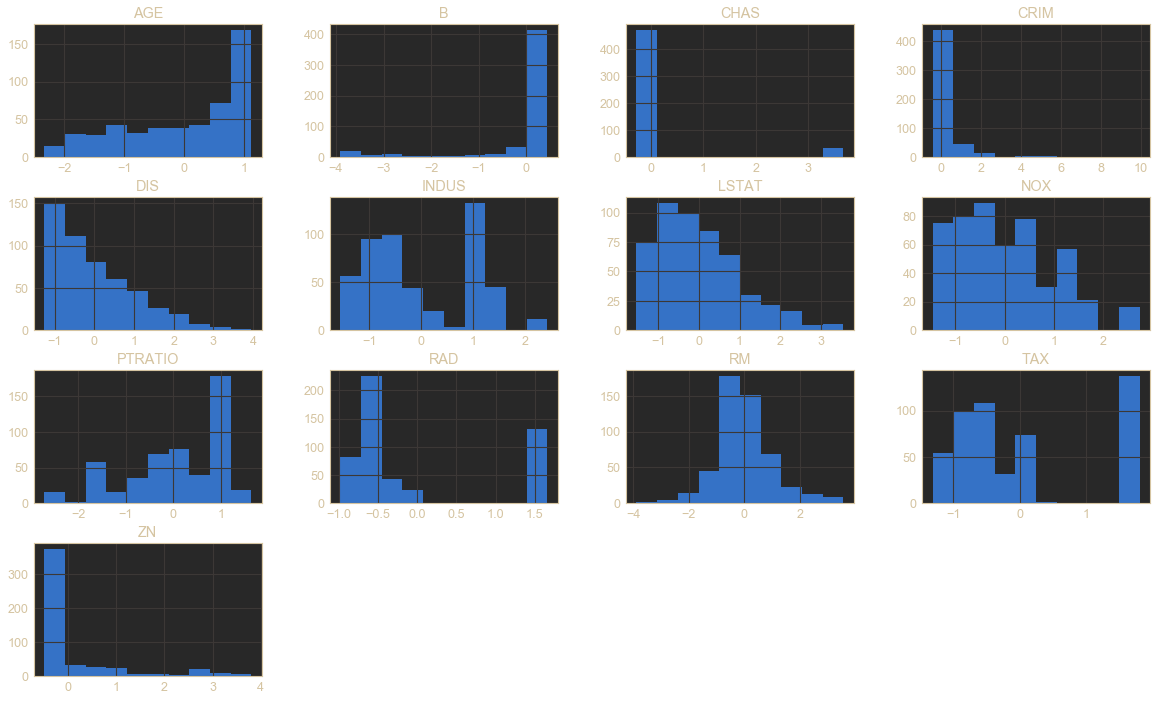

In [42]:
boston_df_stnd_transf.hist(figsize=(20,12))
plt.show()

### Will be using the Normalizer

## 3. Model Evaluation and Metrics 
* We need to understand how we are going to assess our model's performance. This involves:
  * Splitting our Training and Testing data appropriately 
  * Choosing an Evaluation Metric
  * Developing a Baseline Model 


In [43]:
## testing and training splits 

# import statement 
from sklearn.model_selection import train_test_split

# this splits our data into a test and training set
# the function shuffles our data before splitting (so will get both classes in both sets)
# setting a random_state means that this shuffling will be consistent for each run 
# setting stratify=class_y tells the function to have an even number of class labels in each set
X_train, X_test, y_train, y_test = train_test_split(class_X,class_y, test_size=0.3, random_state=1, stratify = class_y)

In [44]:
# we can verify the stratifications using np.bincount
print('Labels counts in y:', np.bincount(class_y))
print('Percentage of class zeroes in class_y',np.round(np.bincount(class_y)[0]/len(class_y)*100))

print("\n")
print('Labels counts in y_train:', np.bincount(y_train))
print('Percentage of class zeroes in y_train',np.round(np.bincount(y_train)[0]/len(y_train)*100))

print("\n")
print('Labels counts in y_test:', np.bincount(y_test))
print('Percentage of class zeroes in y_test',np.round(np.bincount(y_test)[0]/len(y_test)*100))


Labels counts in y: [212 357]
Percentage of class zeroes in class_y 37.0


Labels counts in y_train: [148 250]
Percentage of class zeroes in y_train 37.0


Labels counts in y_test: [ 64 107]
Percentage of class zeroes in y_test 37.0


* Note that there are additional ways to divide our data into test and training sets, and we cover `K-fold cross validation` in the **Pipeline** section below.

In [45]:
## we can create a baseline model to benchmark our other estimators against
## this can be a simple estimator or we can use a dummy estimator to make predictions in a random manner 

# this is the required import statement 
from sklearn.dummy import DummyClassifier

# this creates our dummy classifier, and the value we pass in to the strategy parameter dtermn
dummy = DummyClassifier(strategy='uniform', random_state=1)

# "Train" model
dummy.fit(X_train, y_train)

DummyClassifier(constant=None, random_state=1, strategy='uniform')

In [46]:
## evaluating the model metrics

# Here we get an accuracy score
dummy.score(X_test, y_test)

0.47953216374269003

* There are a number of different ways in `scikit-learn` to get an estimator score and it can get confusing first.
* Remember that to get a score, we need to instantiate a model, fit it to the data, predict using unseen data, compare the predictions against actual data, and score the difference. This is true for classification and regression problems, and is true no matter the method used to get there.
  * So, in the end-to-end tutorials we split the training and test data,  fitted our data to an estimator, and called the `.predict` method on the estimator to get our predictions, and then passed this to a scoring function (four steps)
  * In using the `estimator.score()`method above, we are passing in our split data and the method is then making predictions and returning the score (three steps). 
  * And, in the `cross_val_score()` method used below we are effectively using one step as the method takes an estimator and our data and returns a score. You can find out more about this method [here](https://scikit-learn.org/stable/modules/cross_validation.html) 

In [47]:
## here we fit a new estimator and use cross_val_score to get a score based on a defined metric 

# import statements
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# instantiate logistic regression classifier
logistic = LogisticRegression(solver = 'liblinear')

# we pass our estimator and data to the method. we also specify the number of folds (default is 3)
# the default scring method is the one associated with the estimator we pass in
# we can use the scoring parameter to pass in different scoring methods. Here we use recall.  
cross_val_score(logistic, class_X, class_y, cv=5, scoring="recall")

array([0.98611111, 0.97222222, 0.98591549, 0.95774648, 0.95774648])

### EXERCISE SECTION 3:
* Part 1: Implement binary classification scoring functions 
  * Use `cross_val_score` to implement `f1`, and `precision` scores 
  * Understand what these scores, and the `accuracy` and `recall` scores implemented above, tell us
* Part 2: Another way of assessing our model's performance is with the `Receiving Operating Characteristic (ROC) Curve`. 
  * What does this show us? Can you implement it?
  * Like the other questions here, we can work through these via slack.
* Part 3: What are the main ways of evaluating a mutliclass classification problem?
  * Research and make notes below
* Part 4: Apply the above approach to the Boston dataset. You should think about:
  * What sort of test and training split you want to implement 
    * Be careful to change the variable names for `X_train`, `y_train` etc. so that the new dataset doesn't overwrite those variables
    * Experiment with not using the `stratify =  ` variable
  * The evaluation metrics you wish to use and why (this is different than above as the Boston dataset is a regression problem)
    * Evaluation metrics are covered in *Python Machine Learning*, Chapter 6
  * Implementing a baseline model 
    * *Python Machine Learning*, Chapter 10 has linear regression implementations to draw from.
* Feel free to discuss your approach on Slack and ask for support 

In [48]:
class_X.shape

(569, 30)

In [49]:
class_y.shape

(569,)

In [50]:
## EXERCISE SECTION 3: PART 1
## use the cross_val_score function to pass in and return the scoring functions: precision, f1 
## note the scores and research what each score represents 
from sklearn.model_selection import cross_validate

logistic = LogisticRegression(solver = 'liblinear')

cv_2 = cross_validate(logistic, class_X, class_y, scoring = ['f1', 'precision'], cv = 5, return_train_score=True)

In [51]:
cv_2

{'fit_time': array([0.00709748, 0.00608802, 0.00647211, 0.00558496, 0.00595522]),
 'score_time': array([0.00207376, 0.00174737, 0.00180721, 0.00181103, 0.00165677]),
 'test_f1': array([0.94666667, 0.95238095, 0.97902098, 0.95774648, 0.97142857]),
 'test_precision': array([0.91025641, 0.93333333, 0.97222222, 0.95774648, 0.98550725]),
 'train_f1': array([0.96864111, 0.97033159, 0.96013865, 0.97400347, 0.96347826]),
 'train_precision': array([0.96193772, 0.96527778, 0.95189003, 0.96563574, 0.95847751])}

In [52]:
## EXERCISE SECTION 3: PART 2
## look up and implement the ROC metric 
from sklearn.metrics import roc_curve

log_fit = logistic.fit(class_X, class_y)
class_y_pred = logistic.predict(class_X)

In [53]:
log_fit.score(class_X, class_y)

0.9595782073813708

In [54]:
log_fit.classes_

array([0, 1])

In [55]:
roc = roc_curve(class_y, log_fit.predict_proba(class_X)[:,1], pos_label=1)
#roc = roc_curve(class_y, class_y_pred, pos_label=1)

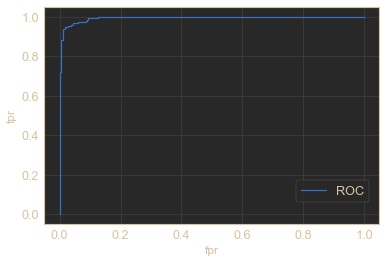

In [56]:
plt.plot(roc[0], roc[1], label = 'ROC')
plt.xlabel('fpr', fontsize = 12)
plt.ylabel('tpr', fontsize = 12)
plt.legend(loc = (0.75,0.1))
plt.show()

**EXERCISE SECTION 3: PART 3**
* What are the evaluation metrics that can be used for mutliclass regression problems?


---

**Answer**
* For multiclass problems, evaluation metrics such as precision, recall and F-measures can be applied to each class of the target. Other metrics are average_precision_score, f1_score and fbeta_score. Different weightings exist for calculating scores when including all labels such as 'micro', 'samples', 'macro' and 'weighted'.

In [57]:
## EXERCISE SECTION 3: PART 4 
## Implement a baseline model and evaluation metric for the Boston dataset (regression)


In [58]:
print(boston_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [59]:
boston_df_norm.values.shape

(506, 13)

In [60]:
boston_norm_transformed.shape

(506, 13)

In [61]:
type(boston_norm_transformed)

numpy.ndarray

In [62]:
boston_y = boston_data.target
type(boston_y)

numpy.ndarray

In [63]:
boston_y.shape

(506,)

In [64]:
boston_y = boston_y.reshape(-1,1)
boston_y.shape

(506, 1)

In [65]:
boston_y[:5]

array([[24. ],
       [21.6],
       [34.7],
       [33.4],
       [36.2]])

#### Dummy Regressor

In [66]:
from sklearn.dummy import DummyRegressor

In [67]:
dummy_reg = DummyRegressor()

In [68]:
dummy_fit = dummy_reg.fit(boston_norm_transformed, boston_y)

##### Evaluation Metric

In [69]:
dummy_fit.score(boston_norm_transformed, boston_y)

0.0

In [70]:
dummy_fit.predict(boston_norm_transformed[0])

array([[22.53280632],
       [22.53280632],
       [22.53280632],
       [22.53280632],
       [22.53280632],
       [22.53280632],
       [22.53280632],
       [22.53280632],
       [22.53280632],
       [22.53280632],
       [22.53280632],
       [22.53280632],
       [22.53280632]])

In [71]:
boston_y[0]

array([24.])

#### Implementing Linear Regression

In [72]:
# Splitting data into training and test data
X_train_boston, X_test_boston, y_train_boston, y_test_boston = train_test_split(boston_norm_transformed, boston_y, test_size = 0.33)

In [73]:
X_train_boston.shape

(339, 13)

In [74]:
X_test_boston.shape

(167, 13)

In [75]:
from sklearn.linear_model import LinearRegression

In [76]:
lin_reg = LinearRegression()

In [77]:
lin_fit = lin_reg.fit(X_train_boston, y_train_boston)

In [78]:
# Training score
lin_fit.score(X_train_boston, y_train_boston)

0.7627192613402249

In [79]:
# Test score. Doesn't seem to overfit
lin_fit.score(X_test_boston, y_test_boston)

0.6924025568598253

In [80]:
# Using cross validation
lin_reg = LinearRegression()
cv_lin_fit = cross_val_score(lin_reg, X_train_boston, y_train_boston, cv = 5, scoring = 'r2', n_jobs=-1)

In [81]:
# R2 values are varying a lot. Implies linear regression is not the right model atleast for this size of data.
cv_lin_fit

array([0.70907271, 0.62462139, 0.72016705, 0.78462825, 0.71600735])

## 4. Classification and regression machine learning algorithms 

### EXERCISE SECTION 4:
* You already have an idea about how to fit and instatiate machine learning models.
* There are a large number of machine learning approaches you can use, and this exercise is about understanding how a number of them perform on our datasets.
* Research and instantiate as many algorithms as you wish in the code cell marked below. 
  * There are a number of examples in *Python Machine Learning*, for example `SVM`, `Decision Trees` and `Logistic Regression` in Chapter 3.

In [82]:
## EXERCISE CODE HERE 


#### Using Breast Cancer dataset

In [83]:
# SVM Classfiers
from sklearn.svm import SVC

svc_class = SVC(kernel = 'rbf', gamma = 'scale', C = 10)
svc_fit = svc_class.fit(class_X, class_y)

In [84]:
svc_fit.score(class_X, class_y)

0.9753954305799648

In [85]:
class_y.shape

(569,)

In [86]:
# Random Forest using multiple decision trees
from sklearn.ensemble import RandomForestClassifier

rf_class = RandomForestClassifier(n_estimators = 100, criterion = 'gini', max_depth = 3, max_features= 'log2', n_jobs = -1)
rf_fit = rf_class.fit(class_X, class_y)

In [87]:
rf_fit.score(class_X, class_y)

0.9736379613356766

## 5. Regularization 
* When we train our models, we might need to prevent against **over-** or **underfitting**. Overfitting is when our model performs well on the training data but does not generalise to unseen data (such as our test set). The model might be too complex, with the parameter weights probably too large and too aligned too closely to the patterns of the training data. The solution is to develop a means of reducing these weights during training, and this is done through a process called **regularization**.
* Underfitting is when our model is too simple to capture patterns in either the training or test sets. Chapters 3 and 10 of *Python Machine Learning* cover this topic in more detail.
* How we regularise the model depends on what estimator we are using. In most cases, we can penalise the increase in parameter weights as the model trains by inserting a regularization term to our model when we instantiate it. This is applicable to regression models, logistics regression and support vector classifiers (see below for implementations).  
* For these estimators, the regularization term is commonly either **L1 Regularization**, where the weights are reduced by a user defined parameter multiplied by the absolute value of the weights (or coefficients); or **L2 Regularization**, where the weights are reduced by a user defined parameter multiplied by the squared sum of the weights.
* For tree based models, such as Decision Trees and Random Forests, we can help prevent overfitting by adjusting parameters associated with the leaf and branch settings.
* Regularization is another reason why feature scaling such as standardization is important. For regularization to work properly, we need to ensure that all our features are on comparable scales.
* We implement L1 and L2 Regularization for regression models in this section. In Section 6, we implement  `RandomSearchCV` (explained below) on a `Logistic Regression` estimator. The parameters that we change in that implementation are related to regularization ('`C`' and '`penalty`').

In [88]:
## For regularization in regression we instantiate new models
## Lasso regression is used for L1 Regularization 
 
# import statement 
from sklearn.linear_model import Lasso

# Create lasso regression with alpha value - this is our hyperparameter 
regression = Lasso(alpha=0.5)
 
# Fit the linear regression
model_l1 = regression.fit(class_X, class_y)

In [89]:
## Ridge regression is L2 Regularization

# import statement 
from sklearn.linear_model import Ridge

# Create ridge regression with an alpha value
regression = Ridge(alpha=0.5)
 
# Fit the linear regression
model_l2 = regression.fit(class_X, class_y)

### EXERCISE FOR SECTION 5
* Part 1: Train both the models above and get a score. Compare the results and see if one type of regularization works better than another.
* Part 2: The `ElasticNet`estimator combines both L1 and L2 Regularization. Look up the estimator on the scikit-learn documentation and a) write out how it combines both regularization methods, and b) see if you can implement it.
* Part 3: We can use `RidgeCV` and `LassoCV` to explore the best regularization parameters for each estimator. Implement one or both of these estimators, defining the parameters you want to search over.
* Part 4: Look at the `DecisionTreeClassifier `documentation in `scikit-learn` and come to a view on which parameters can be set to help prevent overfitting (and therefore help regularization). 

In [90]:
## EXERCISE SECTION 5: PART 1 
model_l1.score(class_X, class_y)

0.6229233925996895

In [91]:
model_l2.score(class_X, class_y)

0.7506851193881935

'L2' works better than 'L1'

In [92]:
## EXERCISE SECTION 5: PART 2 
'ElasticNet regularization uses as penalty a linear combination sum of L1 and L2'

'ElasticNet regularization uses as penalty a linear combination sum of L1 and L2'

In [93]:
from sklearn.linear_model import ElasticNetCV

In [94]:
list(np.arange(0,10,2.5))

[0.0, 2.5, 5.0, 7.5]

In [95]:
model_en = ElasticNetCV(alphas = [0.5],l1_ratio=np.arange(0.1,1,0.25), cv = 5, n_jobs=-1)

In [96]:
model_en_fit = model_en.fit(class_X, class_y)

In [97]:
model_en_fit.l1_ratio_

0.1

In [98]:
model_en_fit.alpha_

0.5

In [99]:
# Seems like underfitting compared to L2. Require more data or bootstrapping
model_en_fit.score(class_X, class_y)

0.6705617826661228

In [100]:
## EXERCISE SECTION 5: PART 3

from sklearn.linear_model import RidgeCV

In [101]:
l2_cv = RidgeCV(alphas = (0.1, 0.5, 1, 10), cv = 3, scoring = 'r2')
l2_cv_fit = l2_cv.fit(class_X, class_y)
l2_cv_fit

RidgeCV(alphas=array([ 0.1,  0.5,  1. , 10. ]), cv=3, fit_intercept=True,
    gcv_mode=None, normalize=False, scoring='r2', store_cv_values=False)

In [102]:
l2_cv_fit.alpha_

0.1

In [103]:
l2_cv_fit.score(class_X, class_y)

0.7613663089567981

In [104]:
from sklearn.linear_model import LassoCV

In [105]:
l1_cv = LassoCV(alphas = (0.1, 0.5, 1, 10), cv = 3)
l1_cv_fit = l1_cv.fit(class_X, class_y)
l1_cv_fit.alpha_

0.1

In [106]:
l1_cv_fit.score(class_X, class_y)

0.6688128299861826

#### EXERCISE SECTION 5: PART 4
* Parameters for preventing overfitting are max_depth and maybe max_features

 ## 6. Optimizing parameters 
 * We applied `GridSearchCV` to identify the best hyperparameters for our models in the in-class regression tutorials.
 * There are other methods available to use that don't take the brute force approach of `GridSearchCV`.
 * We will cover an implementation of `RandomizedSearchCV` below, and use the exercise for you to implement it on the other datatset.
  * We use this method to search over defined hyperparameters, like `GridSearchCV`, however a fixed number of parameters are sampled, as defined by `n_iter` parameter.  
  

In [107]:
# import libraries - note we use scipy for generating a unifor distribution 
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV

# Create logistic regression
logistic = LogisticRegression()

# we can create hyperparameters as a list, as in type regularization penalty 
penalty = ['l1', 'l2']

# or as a distribution of values to sample from -'C' is the hyperparameter controlling the size of the regularisation penelty 
C = uniform(loc=0, scale=4)

# we need to pass these parameters as a dictionary of {param_name: values}
hyperparameters = dict(C=C, penalty=penalty)

# we instantiate our model
randomizedsearch = RandomizedSearchCV(
    logistic, hyperparameters, random_state=1, n_iter=100, cv=5, verbose=0,
    n_jobs=-1)

# and fit it to the data 
best_model = randomizedsearch.fit(class_X, class_y)

/home/sameer/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [108]:
# and we can call this method to return the best parameters the search returned
best_model.best_estimator_

LogisticRegression(C=3.543768397243098, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

### EXERCISE FOR SECTION 6: 
* Part 1: Once we have fit the model to our data, we can call different methods on it, for example we can find out what the best parameters were, and we can predict using the best estimator returned by the search. Use the docs [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) to call these methods on the `best_model` variable above. 
* Part 2: Implement `RandomSearchCV` on the Boston dataset
  * Think about which parameters you want to specify
  * You can pass these parameters to variables prior to creating the random search (as we do above)
  * Then call methods as we do for Part 1.

In [109]:
## EXERCISE SECTION 6: PART 1 
best_model.best_score_

0.9560632688927944

In [110]:
best_model.cv_results_['params'][best_model.best_index_]

{'C': 3.543768397243098, 'penalty': 'l2'}

In [111]:
best_model.best_params_

{'C': 3.543768397243098, 'penalty': 'l2'}

In [112]:
## EXERCISE SECTION 6: PART 2

from sklearn.svm import SVR

In [113]:
# Testing GridSearchCV on standardized data. Takes quite a long time. On non-standardized data, it takes a loooong time
from sklearn.model_selection import GridSearchCV

In [114]:
svr_boston = SVR(kernel = 'rbf')
param_grid = dict(C = range(1,10,2), gamma = np.arange(0, 0.1,0.01))
gsearch_boston = GridSearchCV(svr_boston, param_grid = param_grid, cv = 5, verbose=-1, n_jobs = -1)
gsearch_boston.fit(boston_df_stnd_transf, boston_y.ravel())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    1.8s finished
/home/sameer/anaconda3/lib/python3.5/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'gamma': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]), 'C': range(1, 10, 2)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=-1)

In [115]:
gsearch_boston.best_estimator_

SVR(C=9, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.02,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [116]:
gsearch_boston.best_score_

0.659645176445338

In [117]:
gsearch_boston.scorer_

<function sklearn.metrics.scorer._passthrough_scorer>

In [118]:
gsearch_boston.score(boston_df_stnd_transf, boston_y.ravel())

0.8329109596497793

In [119]:
svr_boston = SVR(kernel = 'rbf') 
# using radial basis function kernel. 
# Using the starting values from RandomSearchCV, GridSearchCV with different kernels can be executed

# setting up parameters
from scipy.stats import uniform
gamma = uniform(0,10)
C = uniform(0,10)
search_params = dict(C=C, gamma = gamma)

rsearchcv_boston = RandomizedSearchCV(svr_boston, search_params, iid=False, n_iter=100, 
                                        cv = 5, verbose =0, n_jobs=-1)

# using standard scaled X values rather than norm as norm (also maxabsscaler) scaling gave low score. Robust transformation gives second best score
rsearchcv_boston.fit(boston_df_stnd_transf, boston_y.ravel())

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
          fit_params=None, iid=False, n_iter=100, n_jobs=-1,
          param_distributions={'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f8f8767f4a8>, 'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f8f8767f240>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [120]:
rsearchcv_boston.best_estimator_

SVR(C=3.7846494242698405, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma=0.05074100282340788, kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [121]:
rsearchcv_boston.best_params_

{'C': 3.7846494242698405, 'gamma': 0.05074100282340788}

In [122]:
rsearchcv_boston.best_score_

0.5396030963497118

In [123]:
# R2 score on the complete dataset. RandomSearchCV gives different results each time. 
rsearchcv_boston.score(boston_df_stnd_transf, boston_y)

0.8240265433242492

## 7. Ensemble models 

* The goal of ensemble methods is to combine different classifiers into a meta-classifier that has better generalization performance than each individual classifier alone. 
* There are several different approaches to achieve this, including **majority voting** ensemble methods, which we select the class label that has been predicted by the majority of classifiers.
* The ensemble can be built from different classification algorithms, such as decision trees, support vector machines, logistic regression classifiers, and so on. Alternatively, we can also use the same base classification algorithm, fitting different subsets of the training set. 
* Indeed, Majority voting will work best if the classifiers used are different from each other and/or trained on different datasets (or subsets of the same data) in order for their errors to be uncorrelated.  Chapter 7 of *Python Machine Learning* has a good discussion of the principles behind Ensemble models. 

In [124]:
# import our classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# lets instantiate individual models 
log_clf = LogisticRegression(solver = 'liblinear')
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

# and an ensemble of them
voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
                              # here we select hard voting, which returns the majority of the predictions, not an average of probabilities
                              voting='hard')

In [125]:
# here we can cycle through the individual estimators 
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    
    # fit them to the training data 
    clf.fit(X_train, y_train)
    
    # get a prediction
    y_pred = clf.predict(X_test)
    
    # and print the prediction 
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.9473684210526315
RandomForestClassifier 0.9590643274853801
SVC 0.6257309941520468
VotingClassifier 0.9590643274853801


/home/sameer/anaconda3/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/sameer/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/sameer/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### EXERCISE FOR SECTION 7: 
* Part 1: Implement **soft voting**.
 * If all the classifiers used in the ensemble are able to estimate class probabilities (they have a `predict_proba()` method that can be called on the estimator), then you can tell Scikit-Learn to predict the class with the highest class probability, averaged over all the individual classifiers. It often achieves higher performance than hard voting because it gives more weight to highly confident votes. 
 *  Replace `voting="hard"` with `voting="soft"` and ensure that all your classifiers can estimate class probabilities. 
  * If you use the SVC estimator, you need to set `probability = True`, which will make the SVC class use cross-validation to estimate class probabilities and add a predict_proba() method. 

* Part 2: Implement Ensemble Learnng on the Boston Dataset.


In [126]:
## EXERCISE SECTION 7: PART 1 
 
log_clf = LogisticRegression(solver = 'liblinear')
rnd_clf = RandomForestClassifier()
svm_clf = SVC(probability = True)

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)], voting='soft')

In [127]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
     
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.9473684210526315


/home/sameer/anaconda3/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier 0.935672514619883
SVC 0.6257309941520468
VotingClassifier 0.9473684210526315


/home/sameer/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/sameer/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [128]:
## EXERCISE SECTION 7: PART 2 


#### Using BaggingRegressor

In [129]:
svr_boston = SVR(kernel = 'rbf', gamma='scale')

In [130]:
from sklearn.ensemble import BaggingRegressor

In [131]:
breg_boston =  BaggingRegressor(svr_boston, n_estimators=10, bootstrap = True)

In [132]:
X_train_boston, X_test_boston, y_train_boston, y_test_boston = train_test_split(boston_df_stnd_transf, boston_y.ravel(), test_size = 0.3)

In [133]:
breg_boston.fit(X_train_boston, y_train_boston)

BaggingRegressor(base_estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [134]:
# Training score
breg_boston.score(X_train_boston, y_train_boston)

0.6450442639388695

In [135]:
# Test score. Seems to be underfitting
breg_boston.score(X_test_boston, y_test_boston)

0.6329245754119032

In [136]:
dict(C = range(1,10,1), kernel = ['rbf', 'linear'])

{'C': range(1, 10), 'kernel': ['rbf', 'linear']}

In [137]:
# Using C=10
breg_boston =  BaggingRegressor(SVR(kernel = 'rbf', gamma = 'scale', C=10), n_estimators=10, bootstrap = True)

In [138]:
# the default gamma value
1/(13*(boston_df_stnd_transf.std())).mean()

0.0768470283855304

In [139]:
breg_boston.fit(X_train_boston, y_train_boston)

BaggingRegressor(base_estimator=SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [140]:
# Much better
breg_boston.score(X_train_boston, y_train_boston)

0.8859078676852937

In [141]:
# Still underfitting
breg_boston.score(X_test_boston, y_test_boston)

0.8540864972943306

#### Fitting each time gives different values. This implies that the data size is not enough to obtain a robust model.

## 8. Building Pipelines
* We can build a pipeline so that many of the steps we have covered to now can be implemented in one step, and be applied to the training and testing set without repeating code.
* We will cover one implementation of a pipeline. The exercise below will link to further information for you to be able implement your own pipelines

In [142]:
# import the libraries - these are dependent on what we wish to implement in our pipelines
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
# this is the pipeline class required to implement all pipelines
from sklearn.pipeline import make_pipeline

In [143]:
# here we instantiate the pipeline with our methods
pipe_lr = make_pipeline(StandardScaler(),                    # takes an arbitary number of transfomers
                        PCA(n_components=2),
                        LogisticRegression(random_state=1, solver = 'liblinear'))  # but ends with an estimator

In [144]:
# here we fit our pipeline to the data, so that the steps above are executed on the training set
pipe_lr.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('logisticregression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_inte...nalty='l2', random_state=1, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False))])

In [145]:
# here we call the predict method on our pipeline model against the test set 
y_pred = pipe_lr.predict(X_test)

In [146]:
# and print out the result
print('Test Accuracy: %.3f' % accuracy_score(y_test, y_pred)) 

Test Accuracy: 0.942


### EXERCISE FOR SECTION 8: 
* Implement a pipeline on the classification dataset (the one used in the example above). Specifically, implement `K-Fold Cross Validation` as set out in  *Python Machine Learning*, Chapter 6.
  Moreinformation on pipelines is available at this [link](https://www.kdnuggets.com/2017/12/managing-machine-learning-workflows-scikit-learn-pipelines-part-1.html) blog series 
* Think about:
  * the code being implemented for `K-Fold Cross Validation` as part of the pipeline. Put comments above the code to explain what is happening. 
  * how you want to preprocess the data
  * whether you want to think about lower the dimensions of the data with something like `Principal Component Analysis`
  * what algorithm you want to use 
  * make sure to predict the data

In [147]:
## EXERCISE CODE HERE

# importing cross validation module
from sklearn.model_selection import cross_val_score

# use the pipeline created above as the estimator
scores = cross_val_score(pipe_lr, X = X_train, y=y_train, cv = 5)

print('CV accuracy scores: ', scores)

CV accuracy scores:  [0.9125     0.95       0.9125     0.97468354 0.98734177]


In [148]:
X_train.shape

(398, 30)

In [149]:
# Certainly, the number of dimensions is high. using PCA increases computational efficiency.
from sklearn.decomposition import KernelPCA 
# Using KernelPCA for decomposing any nonlinearity. Should be first visualized in Exploratory Data Analysis

In [150]:
pipe_lr = make_pipeline(StandardScaler(),                   
                        KernelPCA(n_components=2, kernel = 'rbf'),
                        LogisticRegression(random_state=1, solver = 'liblinear'))

In [151]:
scores = cross_val_score(pipe_lr, X = X_train, y=y_train, cv = 5)
print('CV accuracy scores: ', scores)

CV accuracy scores:  [0.9625     0.95       0.875      0.96202532 0.89873418]


## 9. Review
* We have covered:
  * Scaling and Standardizing Data 
  * Model Evaluation and Metrics 
  * Classification and regression machine learning algorithms  
  * Regularization
  * Optimising parameters 
  * Ensemble models 
  * Building Pipelines
* We have of course not covered everything that it is possible to cover, and there is plenty more to research. Please ask questions on Slack or follow-up with your own research.